# Exercise: A corpus analysis of rock harmony
Trevor de Clercq and David Temperley (2011). A corpus analysis of rock harmony. *Popular Music* 30(1), p. 47-70. 

This notebook provides an extension of the first example of Kris Shaffer's tutorial [Exploring musical data with R: An introduction to computational music analysis](https://pushpullfork.com/exploring-musical-data-with-r/), which introduces frequency distribution tables and related plots of chord instances in David Temperley's (dt) RS 5 x 20 corpus.

Things to learn:
- Description of nominal data
- Data management: 
 - for-loop
 - if-condition
 - the idea of vectorisation
- Advanced graphical options

Data required: resultsBySong.csv  
Libraries required: none

Date: 25-11-2018  
Version: 0.2  
Author: timovarelmann@uni-koeln.de  

**List of Contents**

- [Preparations](#prep)
- [Overall frequency distribution of chromatic relative roots](#overall)
- [Frequency distribution of pre- and post-tonics](#freqDist)
 - [Identification of pre- and post tonic chords in the dataset](#label)
   - [Identification of post-tonics by for-loop and if-statements](#post)
   - [Identification of pre-tonics by for-loop and if statements](#pre)
 - [Frequency distribution of pre- and post-tonics in terms of chromatic relative roots](#freq)
- [Identification of antecedent and consequent chromatic relative roots](#alternative)
- [Chord transition distribution table and vectorisation](#trans)
 - [Getting startet: Vectorisation](#vec)
 - [Frequency distribution of post-tonics](#freqvec)
 - [Frequencies of chord transitions in the whole corpus](#whole)
 - [Visualisation of the chord transition table by mosaic plot](#mosaic)
- ...

## Preparations <a name="prep">

- read the csv-dataset (which provides David Temperley's (dt) annotations) as dataframe
- assign the dataframe to an object called `dt`
- do some inspections on the dataframe

In [1]:
dt <- read.csv('resultsBySong.csv')

In [2]:
print(head(dt))  # show the first six rows of the dataframe
print(tail(dt))  # show the last six rows of the dataframe
str(dt)          # show the structure of the dataframe

     song start  end  RN relChr relDia tonic abs
1 1999_dt   7.0  7.5 I64      0      1     5   5
2 1999_dt   7.5  8.0 V11      7      5     5   0
3 1999_dt   8.0  8.5 I64      0      1     5   5
4 1999_dt   8.5  9.0 V11      7      5     5   0
5 1999_dt   9.0  9.5 I64      0      1     5   5
6 1999_dt   9.5 10.0 V11      7      5     5   0
             song start  end   RN relChr relDia tonic abs
9295 yesterday_dt  44.5 45.0  V/V      2      2     5   7
9296 yesterday_dt  45.0 45.5   IV      5      4     5  10
9297 yesterday_dt  45.5 46.5    I      0      1     5   5
9298 yesterday_dt  46.5 47.0 V6/V      2      2     5   7
9299 yesterday_dt  47.0 47.5   IV      5      4     5  10
9300 yesterday_dt  47.5 48.0    I      0      1     5   5
'data.frame':	9300 obs. of  8 variables:
 $ song  : Factor w/ 99 levels "1999_dt","a_change_is_gonna_come_dt",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start : num  7 7.5 8 8.5 9 9.5 10 10.5 11 11.5 ...
 $ end   : num  7.5 8 8.5 9 9.5 10 10.5 11 11.5 12 ...
 $ R

To understand what these data represent, take a look at section „Analysing the harmony“ in DeClercq + Tempereley 2011, p.54-59. Note that this corpus includes the harmonic analyses of 99, not 100 songs: this is indicated by 99 factor levels of variable $ song.

Here is the beginning of the chord list for Temperleys analysis of 'Hey Jude', cq. figure 3 in DeClercq + Temperley 2011.

`dt[dt$song=="hey_jude_dt",]` returns only those rows of the data frame `dt` for which `dt$song == "hey_jude_dt"`.

Argument `n = 20` of function `head()` specifies the number of rows of the header (default is 6). Because the default position of argument n is the second (see documentation), the argument name is not specified here (I just typed `20`)

In [3]:
print(head(dt[dt$song=="hey_jude_dt",], 20))

            song start  end  RN relChr relDia tonic abs
3039 hey_jude_dt   0.0  1.0   I      0      1     5   5
3040 hey_jude_dt   1.0  3.0   V      7      5     5   0
3041 hey_jude_dt   3.0  4.0   I      0      1     5   5
3042 hey_jude_dt   4.0  5.0  IV      5      4     5  10
3043 hey_jude_dt   5.0  6.0   I      0      1     5   5
3044 hey_jude_dt   6.0  7.0   V      7      5     5   0
3045 hey_jude_dt   7.0  9.0   I      0      1     5   5
3046 hey_jude_dt   9.0 11.0   V      7      5     5   0
3047 hey_jude_dt  11.0 12.0   I      0      1     5   5
3048 hey_jude_dt  12.0 13.0  IV      5      4     5  10
3049 hey_jude_dt  13.0 14.0   I      0      1     5   5
3050 hey_jude_dt  14.0 15.0   V      7      5     5   0
3051 hey_jude_dt  15.0 17.0   I      0      1     5   5
3052 hey_jude_dt  17.0 17.5  IV      5      4     5  10
3053 hey_jude_dt  17.5 18.0  I6      0      1     5   5
3054 hey_jude_dt  18.0 18.5  ii      2      2     5   7
3055 hey_jude_dt  18.5 19.0 vi6      9      6   

## Overall frequency distribution of chromatic relative roots<a name="overall">

As a first step, take a look at the frequency distribution table of the chromatic relative roots, the chromatic intervals of roots above the tonic (`dt$relChr`). The tonic takes value 0, dominant is 7, sub-dominant is 5, ...

In [4]:
table(dt$relChr)


   0    1    2    3    4    5    6    7    8    9   10   11 
3065   53  329  232  191 2052   29 1461  386  681  786   35 

You can now rank the chromatic relative roots by their frequency of occurence using `sort()`:

In [5]:
sort(table(dt$relChr))


   6   11    1    4    3    2    8    9   10    7    5    0 
  29   35   53  191  232  329  386  681  786 1461 2052 3065 

Or reverse it in order to return the frequencies of occurence from highest to lowest:

In [6]:
rev(sort(table(dt$relChr)))


   0    5    7   10    9    8    2    3    4    1   11    6 
3065 2052 1461  786  681  386  329  232  191   53   35   29 

This returns a barplot of the overall frequency distribution:

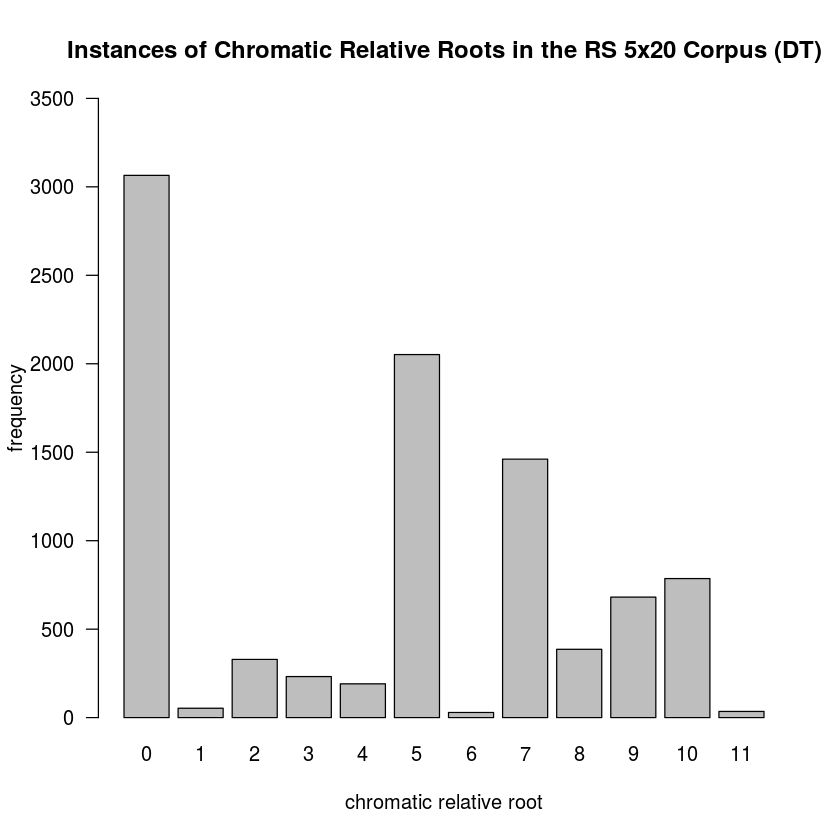

In [7]:
barplot(table(dt$relChr),                                                         # take the fequency distribtion table as data for plotting
        main="Instances of Chromatic Relative Roots in the RS 5x20 Corpus (DT)",  # specify the main title as indicated by a character string
        ylab="frequency", xlab="chromatic relative root",                         # make the plot literate by specification of y and x labels
        ylim=c(0,3500),  las=1)                                                   # extra's': specification of y-axis limits and the orientation of axis labels

Turn to DeClercq + Temperley 2011, page 60. The distribution table of chromatic relative roots in the RS 5x20 corpus shows:
- frequencies of chrom. rel. roots
- relative frequencies of chrom. rel. roots
- number of songs that cover at least one of the chrom. rel. roots (39 instances of songs with root II means: in 39 of all songs there is at least one subdominant-parallel)

We will construct a similar table here. Remember that   
"Root I" in the original table equals `dt$relChr == 0`,   
"Root bII" equals `dt$relChr == 1`, ...   
"Root VII" equals `dt$relChr == 11`

For column "Instances", here's the frequency distribution table again. For columnar orientation of tabular data, use function `cbind()`

In [8]:
print(cbind(table(dt$relChr)))

   [,1]
0  3065
1    53
2   329
3   232
4   191
5  2052
6    29
7  1461
8   386
9   681
10  786
11   35


Assign this matrix to an object called `instances`.

In [9]:
instances <- cbind(table(dt$relChr))

For column "Proportion of total", create a table of relative frequencies. This can be done by use of the additional function `prop.table()`, which converts the absolute frequencies in the table to relative frequencies.

In [10]:
print(prop.table(cbind(table(dt$relChr))))

          [,1]
0  0.329569892
1  0.005698925
2  0.035376344
3  0.024946237
4  0.020537634
5  0.220645161
6  0.003118280
7  0.157096774
8  0.041505376
9  0.073225806
10 0.084516129
11 0.003763441


Rounding these numbers to three decimal places is provided by additional `round()`:

In [11]:
print(round(prop.table(cbind(table(dt$relChr))),3))

    [,1]
0  0.330
1  0.006
2  0.035
3  0.025
4  0.021
5  0.221
6  0.003
7  0.157
8  0.042
9  0.073
10 0.085
11 0.004


In [12]:
prop <- round(prop.table(cbind(table(dt$relChr))),3)

Creation of column "Song instances" is a bit more difficult.    
As a first step to understand the strategy, start with a subset of dataframe `dt` consisting of only those rows for which `dt$relChr == 1`. 

In other words, here are all occurances of the relative chromatic root 1 (i.e. dimished subdominant parallel bII) within the corpus.

In [13]:
print ( dt[dt$relChr == 1,] )

                           song  start    end   RN relChr relDia tonic abs
2898        heartbreak_hotel_dt  48.25  48.50 bII7      1      2     4   5
3535                in_bloom_dt   5.50   5.75  bII      1      2    10  11
3540                in_bloom_dt   7.50   7.75  bII      1      2    10  11
3545                in_bloom_dt   9.50   9.75  bII      1      2    10  11
3550                in_bloom_dt  11.50  11.75  bII      1      2    10  11
3555                in_bloom_dt  13.50  13.75  bII      1      2    10  11
3560                in_bloom_dt  15.50  15.75  bII      1      2    10  11
3597                in_bloom_dt  33.50  33.75  bII      1      2    10  11
3602                in_bloom_dt  35.50  35.75  bII      1      2    10  11
3607                in_bloom_dt  37.50  37.75  bII      1      2    10  11
3612                in_bloom_dt  39.50  39.75  bII      1      2    10  11
3649                in_bloom_dt  57.50  57.75  bII      1      2    10  11
3654                in_bl

Now, `dt[dt$relChr == 1,1]` returns only column 1 of that subset (i.e. the song names) as a vector:

In [14]:
print( dt[dt$relChr == 1, 1] )

 [1] heartbreak_hotel_dt        in_bloom_dt               
 [3] in_bloom_dt                in_bloom_dt               
 [5] in_bloom_dt                in_bloom_dt               
 [7] in_bloom_dt                in_bloom_dt               
 [9] in_bloom_dt                in_bloom_dt               
[11] in_bloom_dt                in_bloom_dt               
[13] in_bloom_dt                in_bloom_dt               
[15] in_bloom_dt                living_for_the_city_dt    
[17] living_for_the_city_dt     living_for_the_city_dt    
[19] living_for_the_city_dt     living_for_the_city_dt    
[21] living_for_the_city_dt     london_calling_dt         
[23] london_calling_dt          london_calling_dt         
[25] london_calling_dt          london_calling_dt         
[27] london_calling_dt          london_calling_dt         
[29] london_calling_dt          london_calling_dt         
[31] london_calling_dt          london_calling_dt         
[33] london_calling_dt          london_calling_dt       

Function `unique()`extracts unique elements of a vector.    

Use that function here to return all unique names of songs in which at least one dimished subdominant parralel occurs:

In [15]:
print (unique(dt[dt$relChr == 1, 1]) )

[1] heartbreak_hotel_dt        in_bloom_dt               
[3] living_for_the_city_dt     london_calling_dt         
[5] smells_like_teen_spirit_dt
99 Levels: 1999_dt a_change_is_gonna_come_dt ... yesterday_dt


Finally, count the elements of that vector by computing its length:

In [16]:
length(unique(dt[dt$relChr == 1, 1]))

[1] 5

Thus, 5 is the number of songs in which at least one diminished subdominant parallel occurs.

To make the code more flexible, use a variable that should index the chromatic relative roots, let's call it `i`.

In [17]:
i = 1
length(unique(dt[dt$relChr == i, 1]))

[1] 5

Following this strategy, song instances can now be computed *for all chromatic relative roots 0 to 11*. 

This is translated to the R language as follows:

In [18]:
for (i in 0:11) {
    length(unique(dt[dt$relChr == i, 1]))
}

There is no output here because all song instances have been computed within the for-loop (internally). Use `print()` as instruction to return a distinct output for all iterations of i:

In [19]:
for (i in 0:11) {
    print(length(unique(dt[dt$relChr == i, 1])))
}

[1] 99
[1] 5
[1] 38
[1] 18
[1] 24
[1] 89
[1] 5
[1] 87
[1] 21
[1] 40
[1] 37
[1] 7


Or assign the output to an object:

In [20]:
for (i in 0:11) {
    song.inst <- length(unique(dt[dt$relChr == i, 1]))
}

In [21]:
print(song.inst)

[1] 7


For every iteration of i over the sequence 0 to 11, object song.inst has been changed. For `i = 11`object `song.inst` has been overwritten for the last time, thus the resulting outcome of that loop is 7.

To create a resulating vector whose elements are the outcomes of each for-loop iteration, combine the result of a current interation with the results of the preceded ones using `c()`:  
`song.inst <- c(song.inst, length(unique(dt[dt$relChr == i, 1])))`.

Note that before you start the for-loop, you need an (empty) vector song.inst in order to combine it with the outcome in the first iteration of the loop.

In [22]:
song.inst <- c()
for (i in 0:11) {
    song.inst <- c(song.inst,length(unique(dt[dt$relChr == i, 1])))
}
print(song.inst)

 [1] 99  5 38 18 24 89  5 87 21 40 37  7


This is the resulting vector of song instances. 

As a last step, use `cbind()` for columnar bindung of the three result-vectors

In [23]:
distr_table <- cbind(instances, prop, song.inst)

and define the column names:

In [24]:
colnames(distr_table) <- c("Instances", "Proportion of total", "Song instances")

In [25]:
print(distr_table)

   Instances Proportion of total Song instances
0       3065               0.330             99
1         53               0.006              5
2        329               0.035             38
3        232               0.025             18
4        191               0.021             24
5       2052               0.221             89
6         29               0.003              5
7       1461               0.157             87
8        386               0.042             21
9        681               0.073             40
10       786               0.085             37
11        35               0.004              7


## Frequency distribution of pre- and post-tonics<a name="freqDist">
Until now, only the overall destribution of chromatic relative roots has been calculated. Let's now turn to chord progressions within the dataset. 

The first aim is to calculate the frequency of occurrence of pre- and post-tonic chords in terms of chromatic relative roots.

### Identification of pre- and post tonic chords in the dataset<a name="label">

This is an example of how to create labels based on criteria which have to be met. The criteria are: pre-tonic and post-tonic.

Expand the dataframe with two columns called pre and post that will finally contain that information. In the first place, fill thema with NAs or empty character strings:

In [26]:
dt <- read.csv('resultsBySong.csv')
dt$pre <- ""
dt$post <- ""

Take a look at the header:

In [27]:
print(head(dt))

     song start  end  RN relChr relDia tonic abs pre post
1 1999_dt   7.0  7.5 I64      0      1     5   5         
2 1999_dt   7.5  8.0 V11      7      5     5   0         
3 1999_dt   8.0  8.5 I64      0      1     5   5         
4 1999_dt   8.5  9.0 V11      7      5     5   0         
5 1999_dt   9.0  9.5 I64      0      1     5   5         
6 1999_dt   9.5 10.0 V11      7      5     5   0         


#### Identification of post-tonics by for-loop and if-statement<a name="post">

For identification of post-tonic chords, one has first to identify the tonics.

Within the corpus, tonics are indicated by:
- Roman numeral labels `I` (major), `i` (minor) and inversions like `I64`
- Diatonic relative root `1`: In `dt$relDia`, number one always and exclusively indicates the tonic, no matter whether it is actually minor, major, or an inversion.
- Chromatic relative root `0`: In `dt$relChr`, number zero always and exclusively indicates the tonic, no matter whether it is actually minor, major, or an inversion.
Here, we will take the chromatic relative root `0` as an indicator of tonics.

`dt$relChr == 0` gives a logical vector which elements are TRUE if the condition "equals zero" is met. Compare:

In [28]:
print(head(dt$relChr))      # Head of vector dt$relChr
print(head(dt$relChr == 0)) # Head of the logical vector

[1] 0 7 0 7 0 7
[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE


Take a look at the first row of the data frame. In the song "1999", a tonic occurs in the first half of measure 7, which is row 1. As such, a post-tonic occurs in row 2 (here, it's the dominant).  
Thus, row 2 should be labeled as post-tonic:

In [29]:
print(head(dt,2))

     song start end  RN relChr relDia tonic abs pre post
1 1999_dt   7.0 7.5 I64      0      1     5   5         
2 1999_dt   7.5 8.0 V11      7      5     5   0         


Now take a variable that should index the row-numbers, let's call it `i`. 

In row 2, thus for `i=2`, we may add a label called "post" in column dt$post:

`dt$post[i] <- "post"`

because in the row before, the following condition is met:

`dt$relChr[i-1] == 0`

We can translate this to an if-statement

**if** `dt$relChr[i-1] == 0`   
**then** `dt$post[i] <- "post"`
   
which is coded in R:

`if (dt$relChr[i-1] == 0) {`  
&nbsp;&nbsp;&nbsp;`dt$post[i] <- "post"`  
&nbsp;&nbsp;&nbsp;`}`

We need to test the if-condition in all rows from row 2 to the last row. As such, the if-condition will be build into a for-loop which specifies the iteration of index i over that sequence of rows:

`for (i in 2:nrow(dt)) {`  
&nbsp;&nbsp;&nbsp;`if-condition`  
`}`

In [30]:
for (i in 2:nrow(dt)) {
    if (dt$relChr[i-1] == 0)  {
        dt$post[i] <- "post"
    }
}

The header looks fine:

In [31]:
print(head(dt))

     song start  end  RN relChr relDia tonic abs pre post
1 1999_dt   7.0  7.5 I64      0      1     5   5         
2 1999_dt   7.5  8.0 V11      7      5     5   0     post
3 1999_dt   8.0  8.5 I64      0      1     5   5         
4 1999_dt   8.5  9.0 V11      7      5     5   0     post
5 1999_dt   9.0  9.5 I64      0      1     5   5         
6 1999_dt   9.5 10.0 V11      7      5     5   0     post


Let's take a look to some other rows in the dataframe, say, at rows 340 to 350:

In [32]:
print(dt[340:350,])

                song  start    end   RN relChr relDia tonic abs pre post
340          1999_dt 181.50 182.00 bVII     10      7     5   3     post
341          1999_dt 182.00 182.25    I      0      1     5   5         
342          1999_dt 182.25 182.50 bVII     10      7     5   3     post
343          1999_dt 182.50 183.00    I      0      1     5   5         
344 all_apologies_dt   0.00  24.00    I      0      1     1   1     post
345 all_apologies_dt  24.00  30.00   IV      5      4     1   6     post
346 all_apologies_dt  30.00  34.00    V      7      5     1   8         
347 all_apologies_dt  34.00  50.00    I      0      1     1   1         
348 all_apologies_dt  50.00  56.00   IV      5      4     1   6     post
349 all_apologies_dt  56.00  64.00    V      7      5     1   8         
350 all_apologies_dt  64.00 108.00    I      0      1     1   1         


Row 343 gives information about the last chord of the song *1999*, which is the tonic.    
Row 344 gives information about the first chord of the song *All apologies*.

Our code did not consider this case: the first chord of the song *All apologies* has been classified as a post-tonic ... this is definitely wrong as the first chord of a song cannot be post tonic.

As such, we need a second condition which prevents first chords of a song to be erroneously labelled as post-tonic. Song name `dt$song[i-1]` must equal `dt$song[i]`.

Only if both conditions `if ((dt$relChr[i-1] == 0) & (dt$song[i-1]==dt$song[i]))` are met, the chord in row i will be anotated as post-tonic.

In [33]:
dt$post <- ""

for (i in 2:nrow(dt)) {
    if ((dt$relChr[i-1] == 0) & (dt$song[i-1]==dt$song[i]))  {
        dt$post[i] <- "post"
    }
}

In [34]:
print(dt[340:350,])

                song  start    end   RN relChr relDia tonic abs pre post
340          1999_dt 181.50 182.00 bVII     10      7     5   3     post
341          1999_dt 182.00 182.25    I      0      1     5   5         
342          1999_dt 182.25 182.50 bVII     10      7     5   3     post
343          1999_dt 182.50 183.00    I      0      1     5   5         
344 all_apologies_dt   0.00  24.00    I      0      1     1   1         
345 all_apologies_dt  24.00  30.00   IV      5      4     1   6     post
346 all_apologies_dt  30.00  34.00    V      7      5     1   8         
347 all_apologies_dt  34.00  50.00    I      0      1     1   1         
348 all_apologies_dt  50.00  56.00   IV      5      4     1   6     post
349 all_apologies_dt  56.00  64.00    V      7      5     1   8         
350 all_apologies_dt  64.00 108.00    I      0      1     1   1         


It worked!

#### Identification of pre-tonics by for-loop and if-statement<a name="pre">

The coding strategy to identify and label the pre-tonics is similar:

In [35]:
for (i in 2:nrow(dt)) {
    if((dt$relChr[i] == 0) & (dt$song[i-1]==dt$song[i])) {
        dt$pre[i-1] <- "pre1"
    }
}

In [36]:
print(dt[340:350,])

                song  start    end   RN relChr relDia tonic abs  pre post
340          1999_dt 181.50 182.00 bVII     10      7     5   3 pre1 post
341          1999_dt 182.00 182.25    I      0      1     5   5          
342          1999_dt 182.25 182.50 bVII     10      7     5   3 pre1 post
343          1999_dt 182.50 183.00    I      0      1     5   5          
344 all_apologies_dt   0.00  24.00    I      0      1     1   1          
345 all_apologies_dt  24.00  30.00   IV      5      4     1   6      post
346 all_apologies_dt  30.00  34.00    V      7      5     1   8 pre1     
347 all_apologies_dt  34.00  50.00    I      0      1     1   1          
348 all_apologies_dt  50.00  56.00   IV      5      4     1   6      post
349 all_apologies_dt  56.00  64.00    V      7      5     1   8 pre1     
350 all_apologies_dt  64.00 108.00    I      0      1     1   1          


### Frequency distribution of pre- and post-tonics in terms of chromatic relative roots<a name="freq">

The functions used here for calculating and plotting absolute and relative frequencies of pre- and post-tonics will be the same as for the overall distribution table in the chapters before.

The only difference is that not all chromatic relative roots (the fifth column) within the corpus will be considered, but only those that precede the tonic ( `dt[dt$pre == "pre1",5]` ) or follow the tonic ( `dt[dt$post == "post",5]` ).

Here is the tail of the subset data frame of pre-tonics whose fith column relChr will be considered for the distribution tables:

In [37]:
tail(dt[dt$pre == "pre1",])

,song,start,end,RN,relChr,relDia,tonic,abs,pre,post
9274,yesterday_dt,30.0,30.5,IV,5,4,5,10,pre1,
9280,yesterday_dt,33.5,34.0,V,7,5,5,0,pre1,
9286,yesterday_dt,37.5,38.0,V,7,5,5,0,pre1,
9292,yesterday_dt,42.5,43.0,V,7,5,5,0,pre1,
9296,yesterday_dt,45.0,45.5,IV,5,4,5,10,pre1,
9299,yesterday_dt,47.0,47.5,IV,5,4,5,10,pre1,


In [38]:
pre1.abs.t  <- table(dt[dt$pre == "pre1",5])   # absolute frequency distribution table pre-tonics
pre1.prop.t <- round(prop.table(pre1.abs.t),3) # conversion to relative distributions table pre-tonics

post.abs.t  <- table(dt[dt$post == "post",5])   # absolute frequency distribution table pre-tonics
post.prop.t <- round(prop.table(post.abs.t),3)  # conversion to relative distributions table pre-tonics

prepost <- cbind(pre1.abs.t, pre1.prop.t, post.abs.t, post.prop.t)  # columnar bindung of all tables
colnames(prepost) <- c("Instances Pre-tonics", "Proportion Pre-tonics", "Instances Post-tonics", "Proportion Post-tonics" )

print(prepost)

   Instances Pre-tonics Proportion Pre-tonics Instances Post-tonics
0                    14                 0.005                    14
1                    38                 0.013                    33
2                   134                 0.045                   150
3                    45                 0.015                    89
4                    26                 0.009                    42
5                  1128                 0.379                  1036
6                     7                 0.002                     4
7                   778                 0.261                   682
8                   223                 0.075                    98
9                   137                 0.046                   303
10                  431                 0.145                   526
11                   19                 0.006                    15
   Proportion Post-tonics
0                   0.005
1                   0.011
2                   0.050
3           

Finally, two barcharts will be created and combined. 

The graphical parameter `mfrow` specifies the position of the plots when combining them.

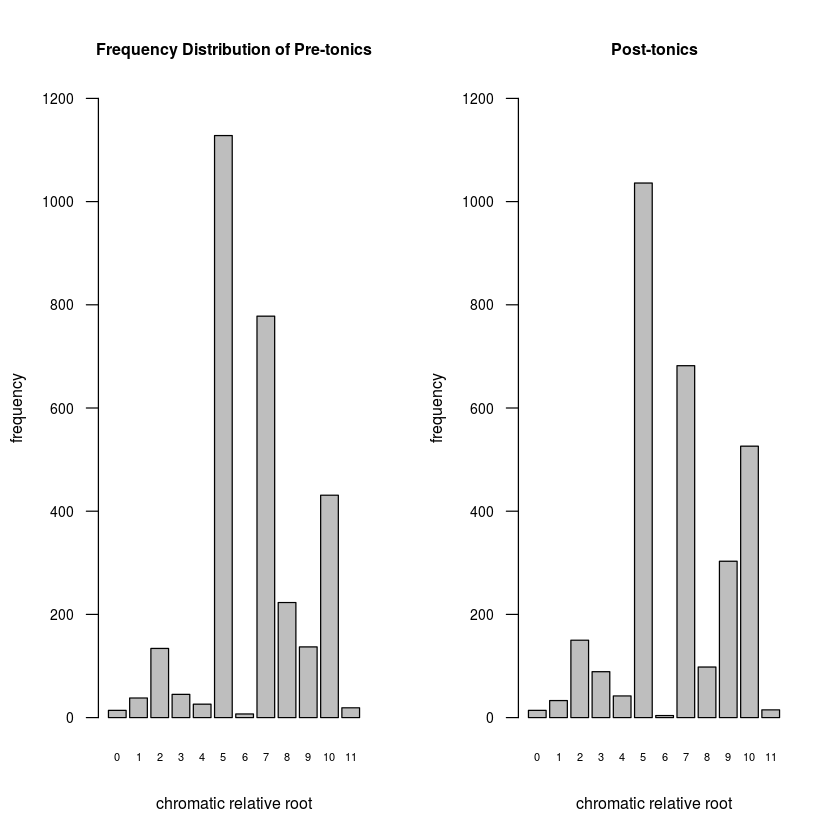

In [39]:
par(mfrow=c(1,2))
barplot( table(dt[dt$pre == "pre1",5]) ,                        # take the fequency distribtion table as data for plotting
        main="Frequency Distribution of Pre-tonics",            # specify the main title as indicated by a character string
        ylab="frequency", xlab="chromatic relative root",       # make the plot literate by specification of y and x labels
        ylim=c(0,1200),  las=1,                                 # specification of y-axis limits and the orientation of axis labels
        cex.main = 0.8, cex.lab= 0.8, cex.axis = 0.7 , cex.names = 0.55)     # specification of the relative size of labels                                          

barplot( table(dt[dt$post == "post",5]) ,                        # take the fequency distribtion table as data for plotting
        main="Post-tonics",                                      # specify the main title as indicated by a character string
        ylab="frequency", xlab="chromatic relative root",        # make the plot literate by specification of y and x labels
        ylim=c(0,1200),  las=1,                                  # specification of y-axis limits and the orientation of axis labels
        cex.main = 0.8,cex.lab=0.8,  cex.axis = 0.7 , cex.names = 0.55)      # specification of the relative size of labels

## Identification of antecedent and consequent chromatic relative roots<a name="alternative">

Here follows an alternative and more powerful strategy for identification of all antecedent and consequent relative roots within the corpus, as has been proposed by Pit Rieger.

Within the corresponding columns `dt$pre` and `dt$post`,the idea is not to label pre- or post-tonics but to indicate the values of antecedent and consequent relative roots for all chords/rows. To achieve this goal, he made use of a combination of for-loop and if-condition.

`identical()` is an alternative for the logical operator `==` which allows for more than two arguments.

In [40]:
dt$pre <- NA
dt$post <- NA

for (i in 2:nrow(dt)) {
    if (identical(dt$song[i-1], dt$song[i],)) {
        dt$pre[i] <- dt$relChr[i-1]
    }     
} 

for (i in 1:nrow(dt)-1) {
    if (identical(dt$song[i], dt$song[i+1],)) {
        dt$post[i] <- dt$relChr[i+1]
    }     
} 

Here is the resulting data.frame (head; tail):

In [41]:
print(head(dt))
print(tail(dt))

     song start  end  RN relChr relDia tonic abs pre post
1 1999_dt   7.0  7.5 I64      0      1     5   5  NA    7
2 1999_dt   7.5  8.0 V11      7      5     5   0   0    0
3 1999_dt   8.0  8.5 I64      0      1     5   5   7    7
4 1999_dt   8.5  9.0 V11      7      5     5   0   0    0
5 1999_dt   9.0  9.5 I64      0      1     5   5   7    7
6 1999_dt   9.5 10.0 V11      7      5     5   0   0    0
             song start  end   RN relChr relDia tonic abs pre post
9295 yesterday_dt  44.5 45.0  V/V      2      2     5   7   9    5
9296 yesterday_dt  45.0 45.5   IV      5      4     5  10   2    0
9297 yesterday_dt  45.5 46.5    I      0      1     5   5   5    2
9298 yesterday_dt  46.5 47.0 V6/V      2      2     5   7   0    5
9299 yesterday_dt  47.0 47.5   IV      5      4     5  10   2    0
9300 yesterday_dt  47.5 48.0    I      0      1     5   5   5   NA


## Chord transition distribution table and vectorisation<a name="trans">

### Getting startet: Vectorisation<a name="vec">

The combination of for-loop and if-condition to label data provides an intuitive way to deal with chord motions in the dataset. But there are some disadvantages. 

Take a look at table 3 in DeClercq + Temperley 2011, p.61. If we were to label all possible combinations of antecedent and consequent chords, this would take a lot of time for coding.   
Also, it would take a lot of processing ressources to do so. For every single iteration of i, the if-condition has to be checked and the vectors `dt$pre` or `dt$post` have to be updated. In each repetition, memory has to be re-allocated.

**Vectorisation** provides a way to save coding and processing ressources and time. Read [Noam Ross: Vectorization in R: Why?](http://www.noamross.net/blog/2014/4/16/vectorization-in-r--why.html) to catch the idea of vectorisation in detail.

Here is an example. Say we have a set of 50000 integers

In [42]:
a <- sample(1:50000, size=50000, replace=TRUE)
length(a)      # is 50000
print(head(a)) # first six elements

[1] 50000

[1] 10627 30955 17669 46994   346  5449


In [43]:
a[4]
a[4] %% 2 != 0

[1] 46994

[1] FALSE

and we want to create a subset of all odd numbers. A  strategy similar to the labelling of post- and pre-tonics above would be this:

In [44]:
odds1 <- c()
for (i in 1:length(a)) {
    if(a[i] %% 2 != 0) {       # for all odd numbers, the result of modulo division a[i] %% 2, the division remainder, is not 0
        odds1 <- c(odds1,a[i]) # element by element, vector odds1 is created
    }
}

Instead of iterating the check-update-process for 50000 times, this vectorised code does the same in two steps:

In [45]:
odds.logical <- a %% 2 != 0   # odds.logical is a logical vector, TRUE for division remainders unequal 0
odds2 <- a[odds.logical]      # assigns all elements of vector a for which the related logical vector element is TRUE

Did you notice the difference in processing time? R performs these operations on whole vectors (here with length = 50000), not for every single vector element.

The strategy of vectorisation, combined with a for-loop of only 12 iterations, will finally be used here to create a matrix of all possible combinations of ante- and consequent chords.

### Frequency distribution of post-tonics<a name="freqvec">

To understand this process, first create a frequency distribution table of post-tonics, i.e. the consequent chords of the tonic "I", in terms of chromatic relative roots. The result must be the same as we have achieved above by labelling post-tonics.

We will start with the `which()`-function, asking: "Which indices are TRUE for the condition `dt$relChr == 0`?" (providing a vector of position indices of tonics in `dt$relChr`)

`which(dt$relChr == 0)`

In [46]:
dt <- read.csv('resultsBySong.csv')

In [47]:
print(head(which(dt$relChr == 0)))   # first six position indices of tonics

[1]  1  3  5  7  9 11


Knowing the indices of tonics, `which(dt$relChr == 0)+1` provides the indices of post-tonics:

In [48]:
print(head(which(dt$relChr == 0)+1)) # first six position indices of post-tonics

[1]  2  4  6  8 10 12


Take this vector to specify the rows in `dt` that provide information on post-tonic chords:

`dt[which(dt$relChr == 0)+1,]`

In [49]:
print(head(dt[which(dt$relChr == 0)+1,]))

      song start end  RN relChr relDia tonic abs
2  1999_dt   7.5   8 V11      7      5     5   0
4  1999_dt   8.5   9 V11      7      5     5   0
6  1999_dt   9.5  10 V11      7      5     5   0
8  1999_dt  10.5  11 V11      7      5     5   0
10 1999_dt  11.5  12 V11      7      5     5   0
12 1999_dt  12.5  13 V11      7      5     5   0


The 5th column provides the chomatic relative roots of these post-tonics:

`dt[which(dt$relChr == 0)+1,5]`

In [50]:
consI_all <- dt[which(dt$relChr == 0)+1,5]    # provides a numerical vector of all post-tonic chromatic relative roots 
print(head(consI_all))

[1] 7 7 7 7 7 7


Remember that we need a second condition which prevents first chords of a new song to be erroneously labelled as post-tonic of previous songs ending with a tonic.

The song names (first column) in rows that represent the tonics (`dt[which(dt$relChr == 0),]`) must equal the song names of consequent rows that represent the post-tonics `dt[which(dt$relChr == 0)+1,]`:

`dt[which(dt$relChr == 0),1] == dt[which(dt$relChr == 0)+1,1]`

In [51]:
consI_same <- dt[which(dt$relChr == 0),1] == dt[which(dt$relChr == 0)+1,1]
print(head(consI_same))

[1] TRUE TRUE TRUE TRUE TRUE TRUE


This is a logical vector which is FALSE for consequent chords of tonics that do not belong to the same song. 

To show that this is the case, take a look at rows 339 to 352 of the dataframe dt:

In [52]:
print(dt[339:352,])

                    song  start    end   RN relChr relDia tonic abs
339              1999_dt 180.50 181.50    I      0      1     5   5
340              1999_dt 181.50 182.00 bVII     10      7     5   3
341              1999_dt 182.00 182.25    I      0      1     5   5
342              1999_dt 182.25 182.50 bVII     10      7     5   3
343              1999_dt 182.50 183.00    I      0      1     5   5
344     all_apologies_dt   0.00  24.00    I      0      1     1   1
345     all_apologies_dt  24.00  30.00   IV      5      4     1   6
346     all_apologies_dt  30.00  34.00    V      7      5     1   8
347     all_apologies_dt  34.00  50.00    I      0      1     1   1
348     all_apologies_dt  50.00  56.00   IV      5      4     1   6
349     all_apologies_dt  56.00  64.00    V      7      5     1   8
350     all_apologies_dt  64.00 108.00    I      0      1     1   1
351 anarchy_in_the_uk_dt   0.00   2.00    V      7      5     0   7
352 anarchy_in_the_uk_dt   2.00   3.00   IV     

In column `dt$relChr`, chromatic relative roots following 0 (the tonic) are 10 (same song: TRUE), 10 (same song: TRUE), 0 (same song: FALSE), 5 (same song: TRUE), 5 (same song: TRUE), 7 (same song: FALSE). This is exactly the information of vectors `consI_all` and `consI_same`:

In [53]:
print(consI_all[165:170])
print(consI_same[165:170])

[1] 10 10  0  5  5  7
[1]  TRUE  TRUE FALSE  TRUE  TRUE FALSE


Now, take `consI_same` as position index vector of `consI_all` in order to exclude all consequent chromatic relative roots of tonic that do not belong to the same song:

In [54]:
consI <- consI_all[consI_same]

We are almost there. Our labelling of post-tonics by for-loop and if-statement provided a total of 2992 elements:

In [55]:
length(dt[dt$post == "post",5])

[1] 0

Instead, vectorisation provided a vector of post-tonics with 2993 elements

In [56]:
length(consI)

[1] 2993

because we created an `NA` in the last position of that vector:

In [57]:
print(tail(consI))

[1] 11 11 11  9  2 NA


Take again a look at the data frame, here are the last rows:

In [58]:
print(tail(dt))

             song start  end   RN relChr relDia tonic abs
9295 yesterday_dt  44.5 45.0  V/V      2      2     5   7
9296 yesterday_dt  45.0 45.5   IV      5      4     5  10
9297 yesterday_dt  45.5 46.5    I      0      1     5   5
9298 yesterday_dt  46.5 47.0 V6/V      2      2     5   7
9299 yesterday_dt  47.0 47.5   IV      5      4     5  10
9300 yesterday_dt  47.5 48.0    I      0      1     5   5


By indentification of post-tonics &mdash; `dt[which(dt$relChr == 0)+1,5]` &mdash; a post-tonic would also be expected in row 9301 which is not available (NA). 

As a last step, exclude that `NA` from vector `consI` by:

In [59]:
consI_final <- consI[!is.na(consI)]  # !is.na(consI) : TRUE for all elements of consI that are not NA

In [60]:
print(tail(consI_final))

[1]  9 11 11 11  9  2


This may seem a long way to achieve the goal, but finally only a few steps were needed to create a vector of all consequent chromatic relative roots of tonics:

In [61]:
consI_all   <- dt[which(dt$relChr == 0)+1,5]
consI_same  <- dt[which(dt$relChr == 0),1] == dt[which(dt$relChr == 0)+1,1]
consI       <- consI_all[consI_same]
consI_final <- consI[!is.na(consI)]

Here is the frequency distribution table:

In [62]:
table(consI_final)

consI_final
   0    1    2    3    4    5    6    7    8    9   10   11 
  14   33  150   89   42 1036    4  682   98  303  526   15 

### Frequencies of chord transitions in the whole corpus<a name="whole">

What has been done for consequent chords of only tonics (`dt$relChr == 0`) can be transferred to a  for-loop in which index variable `i` in `dt$relChr == i` iterates over a sequence from 0 to 11 (compared to the iteration over the sequence `1:nrow(dt)` like above, this is a fairly small loop).

For every `i`, after creation of the final vector `cons_final` a frequency distribution table is computed and bound to the table of the preceding loop. Start with an "empty" transition table.

The term `table(factor(cons_final,lev=0:11))` guarantees that a frequencies = 0 are included into the table.

In [63]:
transTable <- c()

for (i in 0:11) {
    cons_all   <- dt[which(dt$relChr == i)+1,5]
    cons_same  <- dt[which(dt$relChr == i),1] == dt[which(dt$relChr == i)+1,1]
    cons       <- cons_all[cons_same]
    cons_final <- cons[!is.na(cons)]
    transTable <- rbind(transTable, table(factor(cons_final,lev=0:11)))
}

You may now define the row names (i.e. the antecedent chromatic relative roots):

In [64]:
rownames(transTable) <- 0:11

In [65]:
print(transTable)

      0  1   2  3  4    5 6   7   8   9  10 11
0    14 33 150 89 42 1036 4 682  98 303 526 15
1    38  0   0  0  0    0 0   0   0   0   0 14
2   134  0   0  2 18   51 0  75   0  30  18  1
3    45  6   1  0  0   59 5   3  68   0  45  0
4    26  0  41  0  0   52 0   6   0  59   3  4
5  1128 14  27 95 59    0 7 513  61  68  72  1
6     7  0   0  6  0   16 0   0   0   0   0  0
7   778  0  13  4 16  383 4   4   9 191  46  0
8   223  0   2 25  0   22 6  20   0  17  70  0
9   137  0  93  0 40  251 0 121  32   1   5  0
10  431  0   0 11  4  174 3  35 117   9   0  0
11   19  0   0  0 12    0 0   0   0   3   0  0


Done!

### Visualisation of the chord transition table by mosaic plot<a name="mosaic">

The mosaic plot is suitable for visualisation of relative frequencies of data from two or more qualitative variables. The proportions of areas within the plot correspond to relative frequencies of values.

To achieve a plot that takes the same orientation of rows and columns in matrix `transTable`, you have to transpose the matrix using `t()`. This is due to the function's settings.

    
Matrix

$M = \begin{bmatrix}1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix}$

can be transformed by exchanging rows with columns:

$M^T = \begin{bmatrix}1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}$

In [66]:
M  <- matrix(1:6, nrow=3, ncol=2)
MT <- t(M)
print(M)
print(MT)

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6
     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6


Compare these matrices with the plots:

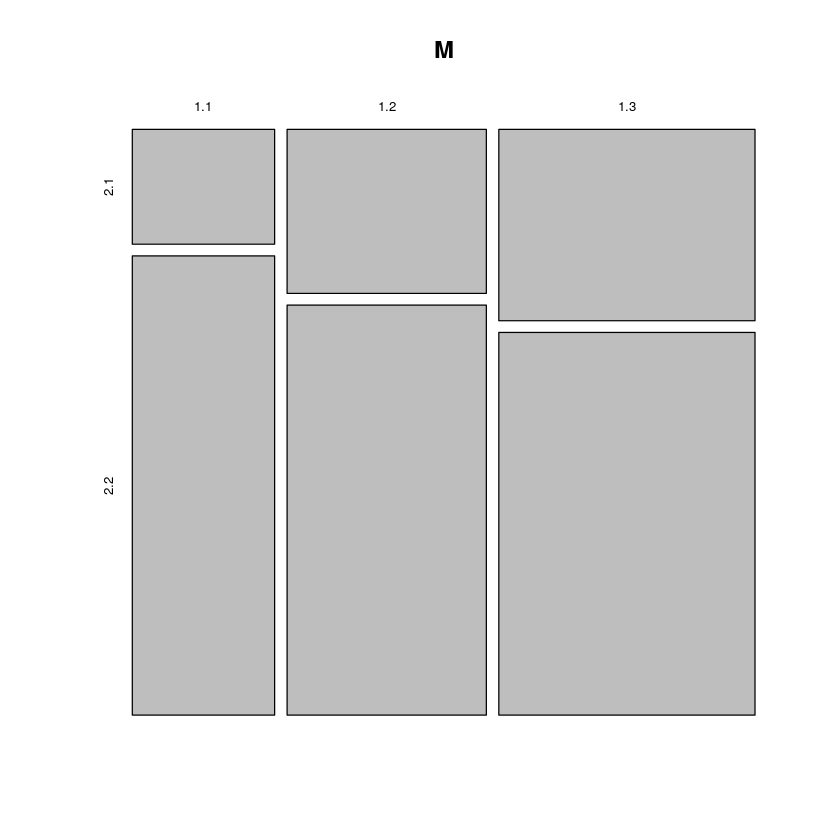

In [67]:
mosaicplot(M)

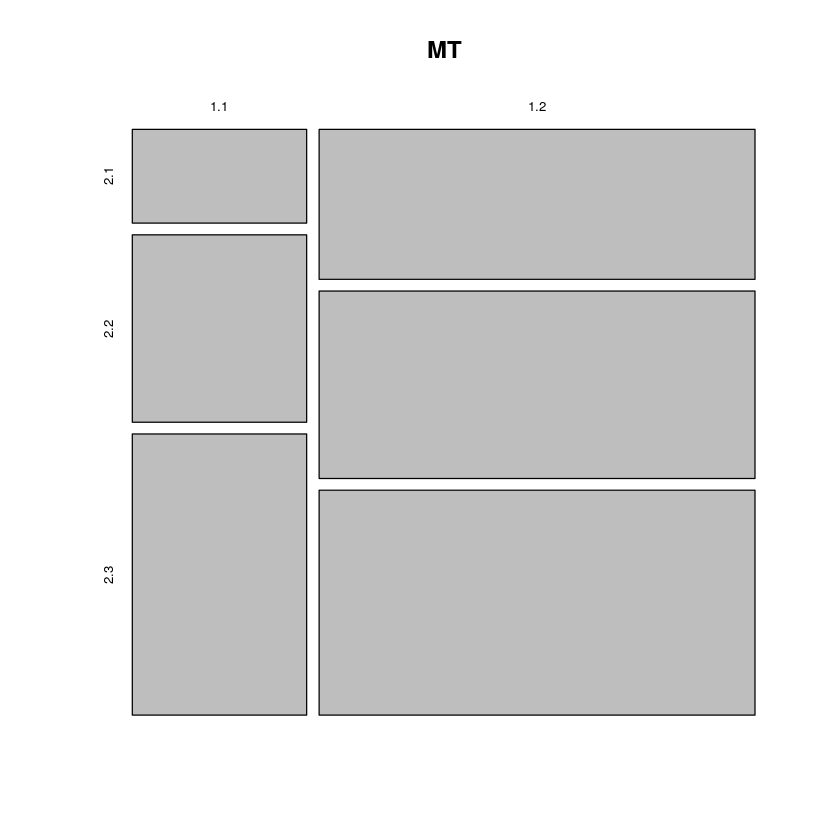

In [68]:
mosaicplot(MT)

The orientation of rows and columns in `mosaicplot(MT)` corresponds to:

In [69]:
print(M)

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6


Here is the mosaic plot of `transTable`. After generating and defining some graphical options of the plot, text has been added fostering literacy of that plot. The plot roughly demonstrated differences frequencies of occurence of specific chord movements in relation to others, but also loses information about absolte or relative frequencies of occurence. It could be argued that such information should be added at least to some areas within the plot that should be highlighted.

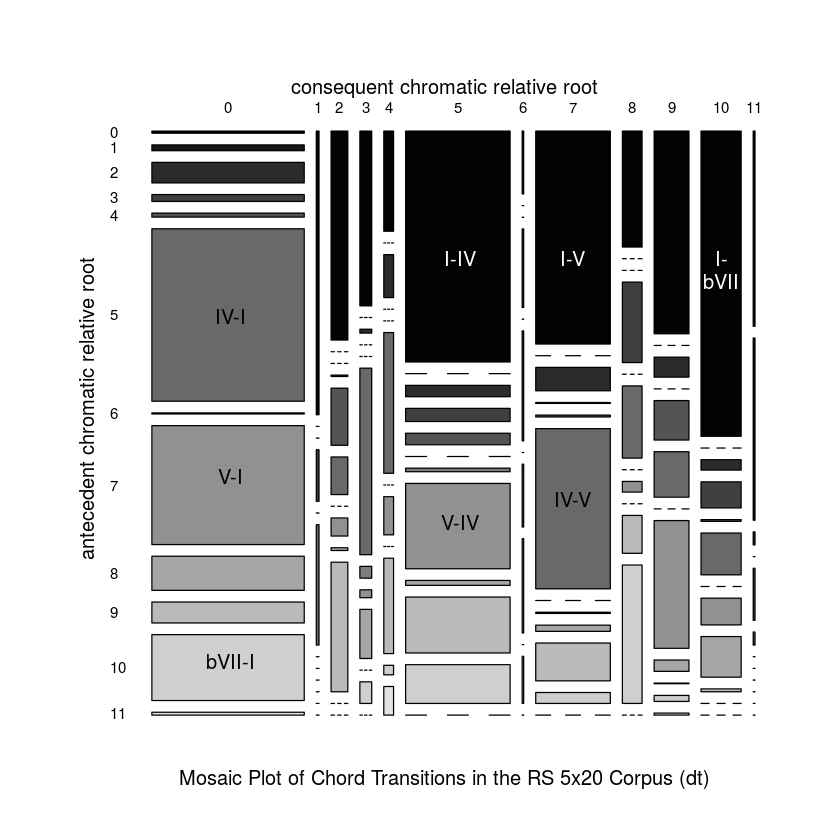

In [70]:
mosaicplot(t(transTable),         # argument x, here the transposed matrix transTable
           las=1, cex.axis=0.75,  # orientation and relative size of axis labels
           col=c("grey1","grey9","grey17","grey25","grey33","grey41","grey49","grey57",
                 "grey65","grey73","grey81","grey89"), # colors for each row of the matrix
           main="",               # here: empty character string as main-title
           sub="Mosaic Plot of Chord Transitions in the RS 5x20 Corpus (dt)") # instead, title below the plot

#<----- By now the mosaicplot has been created. What follows is adding text to that plot -------->#

mtext("consequent chromatic relative root", side=3)       # mtext() is used instead of xlab to add text above the plot, side=3
mtext("antecedent chromatic relative root", side=2)       # for consistency, mtext() is also used instead of ylab

text(2/12,0.66,"IV-I")    # text() places some text at a specified position (x,y) within the plot;
text(2/12,0.38,"V-I")   
text(2/12,0.058,"bVII-I")
text(0.525,0.76,"I-IV",col="white")
text(0.525,0.3,"V-IV")
text(0.7,0.76,"I-V",col="white")
text(0.7,0.34,"IV-V")
text(0.933,0.76,"I-",col="white")
text(0.933,0.72,"bVII",col="white")